In [2]:
import math
from matplotlib import pyplot as plt
import mylibrary
from ASRK_code import adaptive_step_rk
from ASRK_code import adaptive_step_rk_2var

Scenario 1 - Solution for a first-order ODE

In [3]:
def func(t,y):
    f = t**2 - 3*y/t
    return f

def soln_curve(t):
    f = (t**3)/6 + 1/(3*t**3)
    return f

0.1009388410967313         324.1152549954286
0.10187718565592332         315.2416634805305
0.10283321474688781         306.5308598429408
0.10380711547263877         297.9840969498626
0.10479939800501392         289.599700863867
0.1058105800603291         281.376098929142
0.10684120238571847         273.3116898535605
0.10789182549741541         265.4048798446528
0.1089630351224888         257.6540497428721
0.11005543568398042         250.0576115697436
0.11116965448752342         242.6139827526012
0.11230634610989504         235.32156480910933
0.11346619222176742         228.17875498644474
0.114649899426551         221.18396744868818
0.11585820615965002         214.33559956216024
0.11709187893695748         207.6320631897875
0.11835171529787657         201.07177500858208
0.11963855242154939         194.65312164258773
0.12095325680247336         188.37452258030714
0.12229673531426394         182.23438270444885
0.12366993381989676         176.23110995418182
0.12507383635851044         170.

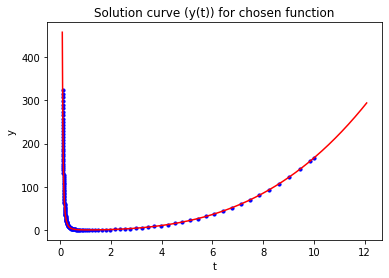

In [4]:
#y(0.1) is almost equal to 333.33
solution = adaptive_step_rk(0.1, 0.1, 10, 333.33, func, 0.00001)

for i in range(len(solution[0])):
    print(solution[0][i],'       ', solution[1][i])
print()

T_analytic = []
Y_analytic = []
t = 0.08

analytic_step = 0.01
for k in range(1200):
    t+=analytic_step
    T_analytic.append(t)
    Y_analytic.append(soln_curve(t))

plt.scatter(solution[0], solution[1], s=10, c='blue')
plt.plot(T_analytic, Y_analytic, c='red')
plt.title("Solution curve (y(t)) for chosen function")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

Scenario 2 - The Earth Hole problem

In [5]:
#as described in the report, we define dy/dt (velocity)
def velocity(t, y):
    g = 9.81
    R = 6.37e6
    y0 = 6.37e6
    ydot = -y0*((g/R)**(1/2))*math.sin(t*(g/R)**(1/2))
    return ydot

#we also define a function (pos) for the solution curve to check our result's accuracy
def pos(t):
    g = 9.81
    R = 6.37e6
    y0 = 6.37e6
    y = y0*math.cos(t*(g/R)**(1/2))
    return y

t        y computed using dy/dt        Analytic solution for y
0         6370000.0         6370000.0
5.0         6369877.37539343         6369877.37539343
89.46827197684883         6330777.892847231         6330777.892567977
361.5782851936695         5739413.924001646         5739413.571036137
606.1744402125587         4651075.753613368         4651075.1255144905
834.5557306078124         3248397.0416064695         3248396.1868547285
1063.5048753916788         1582185.0570330357         1582183.9565473525
1283.3002897344795         -138558.75150928664         -138560.0494800084
1499.4071946706792         -1821135.9761110696         -1821137.4404972533
1716.0530569941084         -3377128.2078208653         -3377129.8134913584
1937.3766634569738         -4715421.920671047         -4715423.640641437
2168.8005490072023         -5735418.056651512         -5735419.850917738
2419.9969695948394         -6309066.487241295         -6309068.267762418
2718.837075154907         -6198706.627956109  

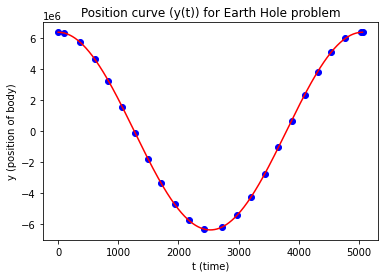

In [6]:
#here, the centre of the earth lies at y = 0
h_initial = 5
pos_initial = 6.37e6 #initial position of body
t_initial = 0
t_final = 5063
epsilon_e = 0.001

t_analytic = []
pos_analytic = []

position = adaptive_step_rk(h_initial, t_initial, t_final, pos_initial, velocity, epsilon_e)
print('t       ', 'y computed using dy/dt', '       Analytic solution for y')
print(t_initial,'       ', pos_initial,'       ', pos(0))
for i in range(len(position[0])):
    print(position[0][i],'       ', position[1][i],'       ', pos(position[0][i]))
print()

t = 0
analytic_step = 5063/10000
for k in range(10000):
    t+=analytic_step
    t_analytic.append(t)
    pos_analytic.append(pos(t))

plt.plot(t_analytic, pos_analytic, 'r-')
plt.scatter(position[0], position[1], c='blue')
plt.title("Position curve (y(t)) for Earth Hole problem")
plt.xlabel("t (time)")
plt.ylabel("y (position of body)")
plt.show()

Scenario 3 - Predator-Prey system

t        x(t)        y(t)
0.0         0.1         0.1
0.001         0.10000900040501216         0.09999100040498785
0.08392060244726812         0.1007581524159996         0.09924756709793567
5.508762259650299         0.16424783839294266         0.060928848585416875
10.726718247304479         0.26810782237565806         0.03939227730052953
14.82432606393768         0.3974277174243115         0.029185253749907675
18.462908534401485         0.5658081050699275         0.023439243344487923
22.084999607960366         0.8059140965793589         0.020028239578601146
25.376739607229226         1.1127174288980257         0.01878869242010516
28.366771664018277         1.4921109659957958         0.019432717108340505
31.11227283861409         1.9530801700905702         0.022243887703378387
33.659242916909065         2.505378814532538         0.02835531655137626
36.04399074826976         3.1586767963261217         0.040601807388336256
38.29840103926021         3.9213708176619853         0.0660542406

471.7055891152528         2.0952333380877466         1.3592592370465644e-05
474.1414729327738         2.673131476086458         1.7748695326703306e-05
476.4184864750538         3.356666609654722         2.597904563481956e-05
478.55748907619545         4.157207010005511         4.300826303850664e-05
480.5753029378011         5.086634616832127         8.132675567585872e-05
482.485735530051         6.157336950338941         0.00017754206063554025
484.30030263086456         7.382180328706622         0.00045258728675008755
486.02878249617913         8.774404680583482         0.0013635414760989019
487.29218263236135         9.954320711254525         0.0036407913366004914
488.09217394763334         10.780237255634125         0.007452541414097118
488.66330715753315         11.408997019525867         0.013028647821693082
489.11356533697915         11.927437864914204         0.020818301773524693
489.48624196438385         12.370730791221689         0.03128308836635546
489.80415812890277         

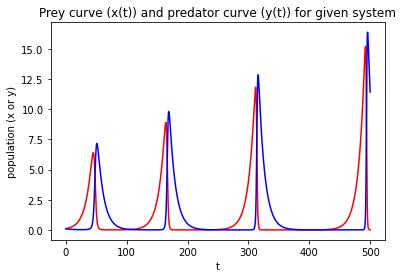

In [6]:
def prey_rate(t, x, y):
    a = 0.1 #birth rate for rabbits
    alpha = 0.1
    xdot = a*x - alpha*x*y
    return xdot
    
def pred_rate(t, x, y):
    c = 0.1 #death rate for foxes
    gamma = 0.1
    ydot = -c*y + gamma*x*y
    return ydot

h_initial = 0.001
x0 = 0.1
y0 = 0.1
t_initial = 0.0
t_final = 500.0
epsilon_pp = 0.000001

population = adaptive_step_rk_2var(h_initial, t_initial, t_final, x0, y0, prey_rate, pred_rate, epsilon_pp)

print('t       ', 'x(t)', '       y(t)')
print(t_initial,'       ', x0,'       ', y0)
for i in range(len(population[0])):
    print(population[0][i],'       ', population[1][i],'       ', population[2][i])
print()

plt.plot(population[0], population[1], 'r-')
plt.plot(population[0], population[2], 'b-')
plt.title("Prey curve (x(t)) and predator curve (y(t)) for given system")
plt.xlabel("t")
plt.ylabel("population (x or y)")
plt.show()

t        x(t)        y(t)
0.0         0.1         0.1
0.001         0.1000290042054065         0.09998100180488569
0.08392060244726812         0.10246356974099385         0.09841817694273576
1.3434737222066906         0.14767004217835727         0.07749544274038209
2.638665248199603         0.21561717991799625         0.06096532769274588
3.8118605019968976         0.30439109176640466         0.04944997651407297
4.8677600023795895         0.41565831840319584         0.04134378003454537
5.828306631323119         0.5522812975326588         0.03550730465079128
6.7112829430200565         0.7175309277160441         0.031246527550017108
7.52975831725169         0.9148881633300472         0.02813294462083399
8.29352662047306         1.1480086100829339         0.02589536221165159
9.010158601116705         1.420718876821599         0.024361583833587903
9.685663936810485         1.7370169136005524         0.023426707307088228
10.324916945725041         2.1010721796584093         0.023036166478751

117.55256456585097         0.12174339692219702         0.006426784382539796
118.87626454174723         0.1809425177862103         0.0050120626012652054
120.07337351452492         0.2589707777181045         0.004031286536238267
121.15247946058793         0.35781427521222064         0.0033407977717438133
122.13493713361747         0.480306556519265         0.0028430335766242995
123.03808065827124         0.6296170881020801         0.0024784204241635396
123.8748794411618         0.8091180200850644         0.0022099014554460045
124.65519367176937         1.0223581422783878         0.0020137964022137887
125.38671957457348         1.273059061237266         0.0018748050129082361
126.0756038070158         1.5651147324162853         0.0017832309250560344
126.7268488962798         1.902591228849704         0.0017334352891852625
127.3445904901321         2.289726418863795         0.0017230359307360546
127.93229325064931         2.7309295736197803         0.0017526257860127994
128.49289312087808  

208.5785351335902         7.829594521418515         33.92529415620777
208.60037886836582         7.318155599863656         34.360061538990934
208.6221671458767         6.8348201343193065         34.76051906556423
208.64394161983253         6.378119422770826         35.128395767533284
208.66574104577472         5.946692791572712         35.46526790344833
208.68760188842947         5.5392738472837095         35.77257905240393
208.70955882262504         5.154679168821987         36.051656471643064
208.7316451601638         4.791798791209555         36.30372462850674
208.7538932127508         4.4495882617003915         36.5299163711535
208.77633461001838         4.127061883590253         36.73128226615445
208.79900058471745         3.823286918518137         36.90879844621349
208.82192222855483         3.5373786488395678         37.063373183473416
208.84513073078986         3.2684960849334206         37.195852451262496
208.868657604482         3.015838228748289         37.307024620084405
20

309.5849257662958         6.305724386065476e-08         0.8477294559852014
310.6768172730059         7.976206969819325e-08         0.6814223323102266
311.8259452569106         1.0411366609740125e-07         0.5415066826949351
313.03835295909624         1.4026792629073923e-07         0.42490778218821273
314.32106289979885         1.9516907891729948e-07         0.32875995267933183
315.68229525108114         2.807564039280547e-07         0.2504046430810603
317.1317494199722         4.182307619105537e-07         0.18738827925294468
318.68097175481705         6.466310625300098e-07         0.13745984343702883
320.34384245401446         1.0408448525997797e-06         0.09856813342392097
322.1372303435262         1.7513438324872117e-06         0.06885864001820195
324.081888658927         3.096909150350697e-06         0.04666996612834293
326.20370436511797         5.7953951841103725e-06         0.03052969124135925
328.53547883280584         1.1582489140846681e-05         0.019149559679499845
33

480.3497838701245         34.80188179618886         0.006066002217229645
480.4784750990925         36.168940908002         0.009251974697152564
480.58762625989516         37.36913612748124         0.013434131818669252
480.68231234006396         38.44096731378698         0.01877821642100395
480.7658389769101         39.41020886441624         0.025459227740257752
480.8404906070447         40.29511810321828         0.03366143083179352
480.9148915389273         41.194310745780506         0.044758133016464766
480.98231670234196         42.02337137016645         0.05829651669294871
481.0431792750322         42.78253202066267         0.0743761633023314
481.09856067508696         43.4813627315524         0.09322307958735301
481.1493677035143         44.12828116185762         0.11509410910971779
481.1963039119804         44.729870734213605         0.14025813697933392
481.2399203896411         45.29128882086312         0.16899301712258394
481.2806571099598         45.816638363984524         0.20

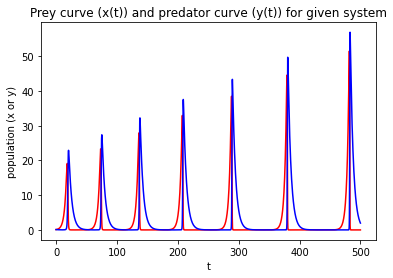

In [7]:
def prey_rate(t, x, y):
    a = 0.3 #birth rate for rabbits
    alpha = 0.1
    xdot = a*x - alpha*x*y
    return xdot
    
def pred_rate(t, x, y):
    c = 0.2 #death rate for foxes
    gamma = 0.1
    ydot = -c*y + gamma*x*y
    return ydot

h_initial = 0.001
x0 = 0.1
y0 = 0.1
t_initial = 0.0
t_final = 500.0
epsilon_pp = 0.000001

population = adaptive_step_rk_2var(h_initial, t_initial, t_final, x0, y0, prey_rate, pred_rate, epsilon_pp)

print('t       ', 'x(t)', '       y(t)')
print(t_initial,'       ', x0,'       ', y0)
for i in range(len(population[0])):
    print(population[0][i],'       ', population[1][i],'       ', population[2][i])
print()

plt.plot(population[0], population[1], 'r-')
plt.plot(population[0], population[2], 'b-')
plt.title("Prey curve (x(t)) and predator curve (y(t)) for given system")
plt.xlabel("t")
plt.ylabel("population (x or y)")
plt.show()

t        x(t)        y(t)
0.0         0.1         0.1
0.001         0.10000900040501216         0.09997100420459355
0.0038460498941515417         0.10003462126605958         0.09988852698660083
0.011946049894151543         0.10010758213170014         0.09965416699818615
1.1450473095125777         0.11085951178890649         0.07174438164937731
2.366984015418666         0.12417485834050765         0.05040353019353399
3.6970082217058637         0.14089139995755018         0.03438251263665849
5.154630554715155         0.16218537869964753         0.022663669100220538
6.765749370640605         0.18984360026940478         0.014346388598569664
8.56471324325448         0.22667476835428402         0.008652560146592386
10.59856510022386         0.2773116337533998         0.004921437111459957
12.934153744528816         0.34986656334351907         0.002604607070539826
15.671153617432342         0.4596843069921198         0.0012598972399350044
18.96819114540835         0.6389527827640041         0.

233.8666615728848         11.422283067659281         7.571791404698734e-07
235.40480817634818         13.32151936443975         2.7632368646786436e-06
236.88146233067485         15.441300917612136         1.2654606498647116e-05
238.3015471656698         17.7974028252211         7.362671388011032e-05
239.6694130480162         20.406002555407863         0.0005507775521288196
240.26102149077863         21.64895880424975         0.0015421362741879345
240.65477778841236         22.51703802942717         0.0032139411186821077
240.95166745685927         23.193355033532242         0.005737097842867667
241.19328186386446         23.757271233841042         0.009345205544385136
241.39768308886994         24.243238316592294         0.014284149486044343
241.5749604638794         24.670600166879314         0.02081656032022382
241.73149351016562         25.051650528390468         0.029223344622332423
241.8716162188495         25.394751026415957         0.03980383588174647
242.0112220619658         25

367.0768436293667         0.3850537709844714         28.05270720884349
367.12854281207024         0.3347964092641336         27.676013037426898
367.1828768871237         0.2896232251695509         27.278120814833127
367.2401134161816         0.24917958942097057         26.858213829545175
367.30055802494655         0.2131241275335048         26.415328410322513
367.3645618126752         0.181128518177079         25.948333868056295
367.4325305905726         0.15287732416979108         25.455908498952837
367.5049365068832         0.12806785418386551         24.93651074490962
367.58233282113486         0.10641005357719206         24.38834436456701
367.6653728853619         0.08762642264652637         23.80931614335505
367.7548348188385         0.07145196121440682         23.196984262595386
367.8516540013402         0.057634138390050216         22.54849490233573
367.95696647536136         0.04593288654107928         21.860503948543233
368.07216783940055         0.03612061866189373         21

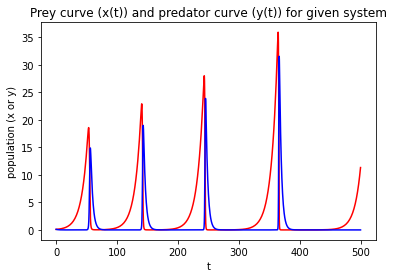

In [8]:
def prey_rate(t, x, y):
    a = 0.1 #birth rate for rabbits
    alpha = 0.1
    xdot = a*x - alpha*x*y
    return xdot
    
def pred_rate(t, x, y):
    c = 0.3 #death rate for foxes
    gamma = 0.1
    ydot = -c*y + gamma*x*y
    return ydot

h_initial = 0.001
x0 = 0.1
y0 = 0.1
t_initial = 0.0
t_final = 500.0
epsilon_pp = 0.000001

population = adaptive_step_rk_2var(h_initial, t_initial, t_final, x0, y0, prey_rate, pred_rate, epsilon_pp)

print('t       ', 'x(t)', '       y(t)')
print(t_initial,'       ', x0,'       ', y0)
for i in range(len(population[0])):
    print(population[0][i],'       ', population[1][i],'       ', population[2][i])
print()

plt.plot(population[0], population[1], 'r-')
plt.plot(population[0], population[2], 'b-')
plt.title("Prey curve (x(t)) and predator curve (y(t)) for given system")
plt.xlabel("t")
plt.ylabel("population (x or y)")
plt.show()